In [1]:
import sys
sys.path.append('../')
from s1_lia.search import find_static_opera_files
from s1_lia.download import download_results, merge_lia_by_relative_orbit, generate_name_stem

In [2]:
wkt = 'POLYGON((-107.5 37.6,-107.5 38.0,-108.0 38.0,-108.0 37.6,-107.5 37.6))'

In [3]:
results = find_static_opera_files(wkt, 129)

INFO:s1_lia.search:ASF search attempt 1/10 for AOI and relative orbit [129]
INFO:asf_search:SEARCH: Using search opts {
    "intersectsWith": "POLYGON ((-107.5000000000000000 37.6000000000000014, -107.5000000000000000 38.0000000000000000, -108.0000000000000000 38.0000000000000000, -108.0000000000000000 37.6000000000000014, -107.5000000000000000 37.6000000000000014))",
    "platform": [
        "SENTINEL-1A",
        "SENTINEL-1B",
        "SENTINEL-1C"
    ],
    "processingLevel": [
        "RTC-STATIC"
    ],
    "relativeOrbit": [
        129
    ],
    "dataset": [
        "OPERA-S1"
    ]
}
INFO:asf_search:SEARCH: Using cmr endpoint: "https://cmr.earthdata.nasa.gov/search/granules.umm_json"
INFO:asf_search:SUBQUERY 1: Beginning subquery with opts: {
    "intersectsWith": "POLYGON ((-107.5000000000000000 37.6000000000000014, -107.5000000000000000 38.0000000000000000, -108.0000000000000000 38.0000000000000000, -108.0000000000000000 37.6000000000000014, -107.5000000000000000 37.60000

In [7]:
data_dir = '/Users/zmhoppinen/Documents/s1_lia/local'
successes= download_results(results, data_directory= data_dir)

INFO:s1_lia.download:Downloaded OPERA_L2_RTC-S1-STATIC_T129-275786-IW1_20140403_S1A_30_v1.0_local_incidence_angle.tif to /Users/zmhoppinen/Documents/s1_lia/local
INFO:s1_lia.download:Downloaded OPERA_L2_RTC-S1-STATIC_T129-275785-IW1_20140403_S1A_30_v1.0_local_incidence_angle.tif to /Users/zmhoppinen/Documents/s1_lia/local
INFO:s1_lia.download:Downloaded OPERA_L2_RTC-S1-STATIC_T129-275784-IW1_20140403_S1A_30_v1.0_local_incidence_angle.tif to /Users/zmhoppinen/Documents/s1_lia/local
INFO:s1_lia.download:Downloaded OPERA_L2_RTC-S1-STATIC_T129-275783-IW1_20140403_S1A_30_v1.0_local_incidence_angle.tif to /Users/zmhoppinen/Documents/s1_lia/local


In [8]:
files = merge_lia_by_relative_orbit(successes, data_dir, generate_name_stem(wkt))

INFO:s1_lia.download:Generated name stem from place: San_Juan_County_37.8_-107.75
INFO:s1_lia.download:Merged 5 files for orbit 129 into /Users/zmhoppinen/Documents/s1_lia/local/San_Juan_County_37.8_-107.75_129_inc.tif


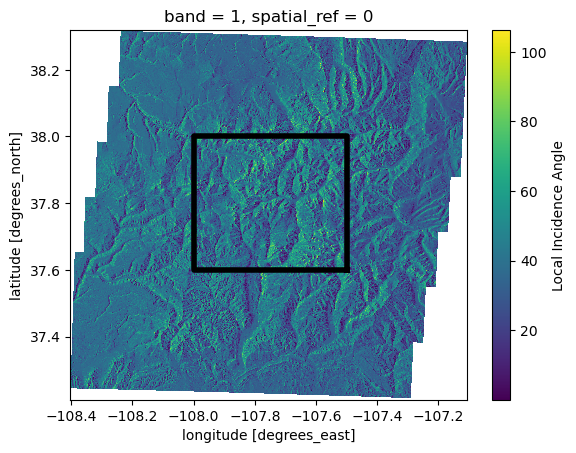

In [ ]:
import xarray as xr
import shapely
import matplotlib.pyplot as plt
x, y = shapely.from_wkt(wkt).exterior.xy
xr.open_dataarray(files[0]).rio.reproject('EPSG:4326').plot()
plt.gca().plot(x,y, color = 'k', linewidth = 4)

In [ ]:
from pathlib import Path
fp = Path('/Users/zmhoppinen/Documents/s1_lia/local/OPERA_L2_RTC-S1-STATIC_T151-322414-IW1_20140403_S1A_30_v1.0_local_incidence_angle.tif')

In [ ]:
import re
filename = fp.stem  # example filename stem
match = re.search(r"_T(\d{3})", filename)
if not match:
    raise ValueError(f"Could not extract relative orbit from filename: {fp}")
orbit = int(match.group(1))
orbit

151